# Image Enhancement

In [2]:
import img_reader as rd
import numpy as np

img = rd.read_img("images/01-why1.jpg")
rd.show_img(img)

<Figure size 640x480 with 1 Axes>

### Transform rgb to gray values

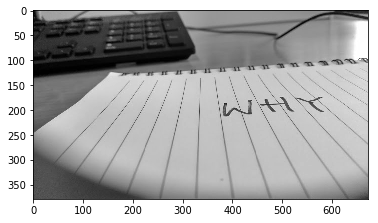

In [3]:
def rgb2gray(rgb):
    return np.dot(rgb, [0.299, 0.587, 0.114])

img_gray = rgb2gray(img)
rd.show_img(img_gray)

In [4]:
print(img_gray)

[[ 15.918  15.206  11.195 ...,  49.071  46.071  44.772]
 [ 13.918  14.918  14.206 ...,  48.071  41.071  49.772]
 [ 12.918  12.918  15.206 ...,  43.082  51.082  41.772]
 ..., 
 [ 78.058  77.172  78.884 ...,  57.762  55.876  57.121]
 [ 78.058  77.172  78.884 ...,  50.762  51.876  50.762]
 [ 79.058  76.058  79.884 ...,  45.762  49.876  45.876]]


## Gray Value Transformation (Grauwerttransformation)

Necessary to extract object's features more easily. Reasons:
- weak contrast
- changed contrast
- uneven illumination

Input gray value: $g_{r,c}$ <br>
$ t_{r,c} = f(g_{r,c}) $

Example: Gamma-Correction

$ f(g) = 255 * (\frac{g}{255})^{l/\gamma} $

gamma value: 1


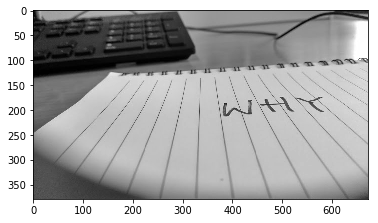

gamma value: 4


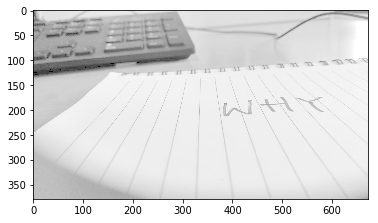

gamma value: 7


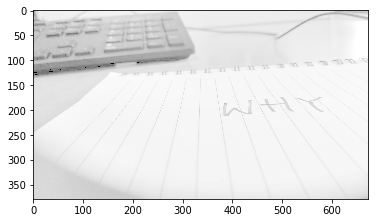

gamma value: 10


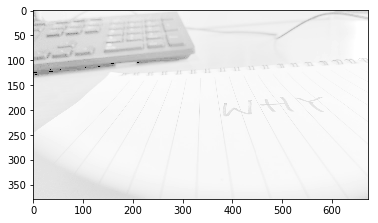

In [24]:
for i in range(1,12,3):
    print("gamma value: %s" % i)
    rd.show_img(255*(img_gray/255)**(1/i))

### Contrast Enhancement

Finding optimal a and b to maximize contrast

$ f(g) = (\frac{255}{g_{max} - g_{min}}) ( g - g_{min} )$

- $ a = 255 / (g_{max} - g_{min}) $
- $ b = -a g_{min} $

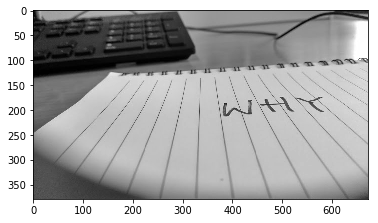

In [41]:
def clip( img ):
    return np.minimum( np.maximum(img, 0), 255 )

max_val = (np.amax(img_gray))
min_val = (np.amin(img_gray))
rd.show_img(clip(255/(max_val - min_val))*(img_gray - min_val))

#### Problem: Contrast is exactly the same as in the original image..
- the function does not change anything because they values of the original are already well scaled
- not much room for improvement

#### Conclusion
- single pixel being very bright (reflection)
- single pixel being very dark (shades)
- prevents us from using the desired gray value range

### Histogram of gray values

0. round values to int
1. count frequency of values

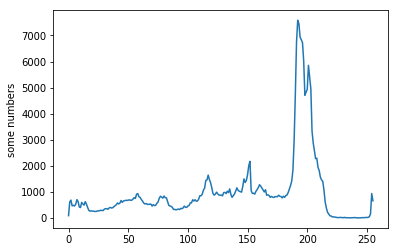

In [27]:
from itertools import groupby
temp1 = np.rint(img_gray)
temp1 = np.reshape(temp1, (-1))

import collections
counter=collections.Counter(temp1)
histogram = (list(counter.values()))


import matplotlib.pyplot as plt
plt.plot(histogram)
plt.ylabel('some numbers')
plt.show()

### Cumulative Histogram

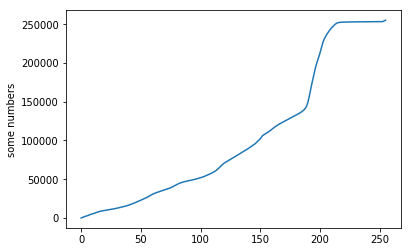

In [33]:
cumulative = 0
acc = []
for value in histogram:
    cumulative += value
    acc.append( cumulative )
plt.plot(acc)
plt.ylabel('some numbers')
plt.show()

original


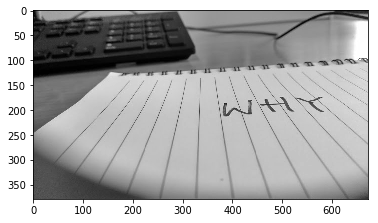

ignore top and bottom vals: 50, 200


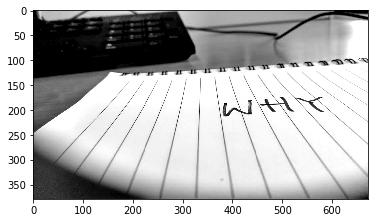

ignore top and bottom vals: 100, 180


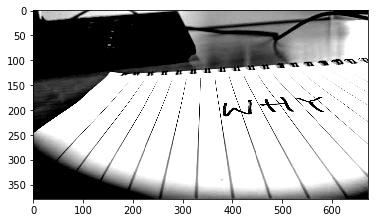

In [47]:
print("original")
rd.show_img(img_gray)

print("ignore top and bottom vals: 50, 200")

max_val = 200
min_val = 50

temp10 = (255/(max_val - min_val))*(img_gray - min_val)
rd.show_img(clip(temp10))

print("ignore top and bottom vals: 100, 180")

max_val = 180
min_val = 100

temp10 = (255/(max_val - min_val))*(img_gray - min_val)
rd.show_img(clip(temp10))

### Result: Higher contrast in the relevant area
- Shadows towards the edges does not influence our contrast as much anymore

## Shading-Correction ????

- Sometimes it is not possible to achieve an evenly lit image (round bottles)
- Describe irregularities: $ f(r,c) = \alpha r^2 + \beta r c + \gamma c^2 + \delta r$

- During runtime, correct pixels: $ t_{r,c} = g_{r,c} - f(r,c) $

## Brightness and Contrast adjustment ???

## Image Smoothing
- suppress noise in image
- noise: random changes of gray values (due to randomness of photons)


- each pixel: $ \hat{g}_{r,c} = g_{r,c} + n_{r,c} $
- $n_{r,c}$ random variable with mean 0 and variance $\sigma^2$

### Solution
- temporal averaging
    - $g_{r_c} = \frac{1}{n}\sum_{i=1}^{n}\hat{g}_{r,c;i} $
    - disadvantage: n images required
- temporal averaging can be replaced with spatial averaging if the stochastic process is ergodic

## Mean Filter: Spatial averaging (Mittelwertfilter)

- $g_{r,c} = \frac{1}{(2n+1)(2m+1)}\sum_{i=-n}^{n}\sum_{j=-m}^{m}\hat{g}_{r-i,c-j} $

### Effect of Line-Jitter

### Border Treatment of Filters

Problem: at the edge of picture the filter mask extends out of the image

Solution:
- apply filter only to pixel inside the image
- view gray values as constants, e.g. 0
    - leads to darker borders
- extend image with border gray value
- mirror image at the edges


### Test: Apply Mean Filter of 3x3

original


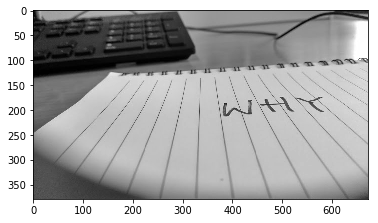

mean_3x3


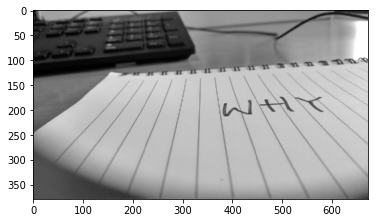

In [52]:
def get_avg( img, x, y ):
    suma = 0
    for i in range(x-1, x+2):
        for j in range(y-1, y+2):
            suma += img[i][j]
    return suma/(3*3)

mean_3x3 = np.array(img_gray)
for i in range(1, len(mean_3x3) - 1):
    for j in range(1, len(img[0]) - 1):
        mean_3x3[i][j] = get_avg( img_gray, i, j )
        
print("original")
rd.show_img(img_gray)
print("mean_3x3")
rd.show_img(mean_3x3)

### Mean 5x5

original


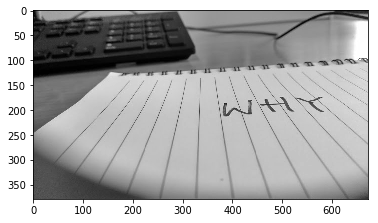

mean_5x5


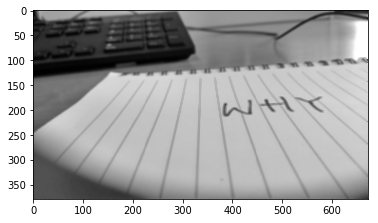

In [54]:
def get_avg( img, x, y ):
    suma = 0
    for i in range(x-2, x+3):
        for j in range(y-2, y+3):
            suma += img[i][j]
    return suma/(5*5)

mean_5x5 = np.array(img_gray)
for i in range(2, len(mean_5x5) - 2):
    for j in range(2, len(img[0]) - 2):
        mean_5x5[i][j] = get_avg( img_gray, i, j )
        
print("original")
rd.show_img(img_gray)
print("mean_5x5")
rd.show_img(mean_5x5)

### Disadvantages
- Mean filter not optimal, does not filter high frequency fluctuations
- kein Tiefpassfilter
- nicht rotationsinvari